In [1]:
import time

def TicTocGenerator():
    # Generator that returns time differences
    ti = 0           # initial time
    tf = time.time() # final time
    while True:
        ti = tf
        tf = time.time()
        yield tf-ti # returns the time difference

TicToc = TicTocGenerator() # create an instance of the TicTocGen generator

# This will be the main function through which we define both tic() and toc()
def toc(tempBool=True):
    # Prints the time difference yielded by generator instance TicToc
    tempTimeInterval = next(TicToc)
    if tempBool:
        print( "Elapsed time: %f seconds.\n" %tempTimeInterval )

def tic():
    # Records a time in TicToc, marks the beginning of a time interval
    toc(False)

In [2]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install pillow

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [6]:
import pandas as pd
import scipy as sc
import numpy as np
from numpy import asarray
import requests
import csv
import cv2
import matplotlib.pyplot as plt
import scipy.ndimage
from PIL import Image


In [7]:
tic()
time.sleep(1)

toc()


Elapsed time: 1.010348 seconds.



# Filters 

In [35]:
m_enh=np.zeros([3,3],dtype=int)
m_enh[1,1]= 5
m_enh[1,0]=-1
m_enh[1,2]=-1
m_enh[0,1]=-1
m_enh[2,1]=-1
print("Enhancement mask:")
print(m_enh)

Enhancement mask:
[[ 0 -1  0]
 [-1  5 -1]
 [ 0 -1  0]]


In [36]:
m_smooth=np.ones([3,3])/9
print("Smoothing mask:")
print(m_smooth)

Smoothing mask:
[[0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]]


In [10]:
def imfilter(img,mask):
    r, c = mask.shape
    h, w = img.shape

    img_padded=np.pad(img, c-1, 'constant')
    img_masked=np.zeros([h+r+1,w+c+1],dtype=int)
    q=0
    # iterating trought padded matrix  
    for i in range(0,h+r-1):
        for j in range(0,w+c-1):
                # with r*c mask  
            for k in range(0,r):
                for l in range (0,c):
                    q=q+mask[k,l]*img_padded[i+k,j+l]
            img_masked[i+1,j+1]=q
            q=0
    img_unpadded=img_masked[r-1:h+r-1,c-1:w+c-1]
    return img_unpadded
                    
                    
            

# Tests 

In [11]:
img2= cv2.imread('cat.jpeg',cv2.IMREAD_GRAYSCALE)
print(img2.shape)

(888, 888)


In [12]:
image2 = cv2.resize(img2, (256, 256)) 
cv2.imshow('image', image2)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [13]:
arr2 = np.asarray(image2)
print(arr2.shape)

(256, 256)


In [14]:

pl1=imfilter(arr2,m_smooth)

cv2.imwrite('s_img.jpg', pl1)
s_img= cv2.imread('s_img.jpg')
cv2.imshow('smoothed', s_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [15]:

pl2=imfilter(arr2,m_enh)

cv2.imwrite('enh_img.jpg', pl2)
enh_img= cv2.imread('enh_img.jpg')
cv2.imshow('enhanced', enh_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Lets compare to library function 

In [49]:

lf1 = cv2.filter2D(image2,-1,m_smooth)

cv2.imwrite('lf1.jpg', lf1)
lft1= cv2.imread('lf1.jpg')

cv2.imshow('smoothed l.f.', lft1)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [48]:

lf2 = cv2.filter2D(image2,-1,m_enh)

cv2.imwrite('lf2.jpg', lf2)
lft2= cv2.imread('lf2.jpg')
cv2.imshow('enhanced l.f.', lft2)
cv2.waitKey(0)
cv2.destroyAllWindows()

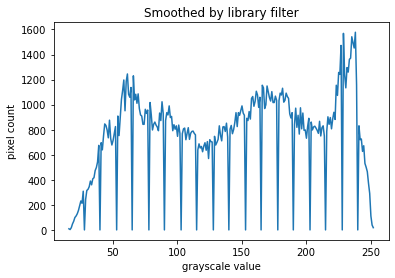

In [50]:
histogram, bin_edges = np.histogram(lft1, bins=256)

plt.figure()
plt.title("Smoothed by library filter")
plt.xlabel("grayscale value")
plt.ylabel("pixel count")
plt.plot(bin_edges[0:-1], histogram) 

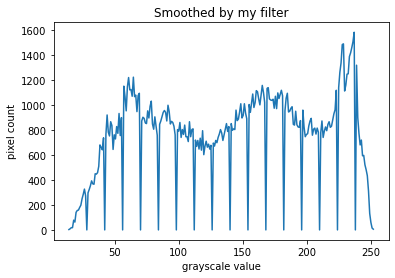

In [51]:
histogram, bin_edges = np.histogram(s_img, bins=256)

plt.figure()
plt.title("Smoothed by my filter")
plt.xlabel("grayscale value")
plt.ylabel("pixel count")
plt.plot(bin_edges[0:-1], histogram) 

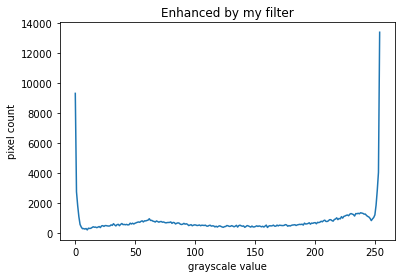

In [59]:
histogram, bin_edges = np.histogram(enh_img, bins=256)

plt.figure()
plt.title("Enhanced by my filter")
plt.xlabel("grayscale value")
plt.ylabel("pixel count")
plt.plot(bin_edges[0:-1], histogram) 

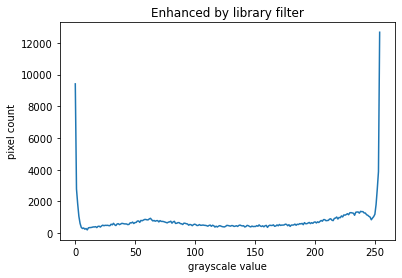

In [60]:
histogram, bin_edges = np.histogram(lft2, bins=256)

plt.figure()
plt.title("Enhanced by library filter")
plt.xlabel("grayscale value")
plt.ylabel("pixel count")
plt.plot(bin_edges[0:-1], histogram) 

In [52]:
m=lft1-s_img

cv2.imwrite('m.jpg', m)
m1= cv2.imread('m.jpg')
cv2.imshow('smoothing filters diffrence ', m)
cv2.waitKey(0)
cv2.destroyAllWindows()

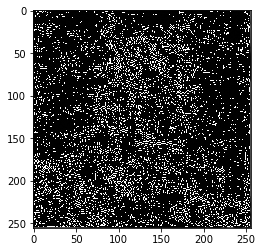

In [53]:
plt.imshow(m, interpolation='nearest')
plt.show()

In [54]:
n=lft2-enh_img

cv2.imwrite('n.jpg', n)
n1= cv2.imread('n.jpg')
cv2.imshow('enhancement filters diffrence ', n)
cv2.waitKey(0)
cv2.destroyAllWindows()

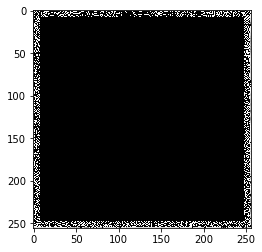

In [55]:
plt.imshow(n, interpolation='nearest')
plt.show()